## Import der Daten und grundlegende Analyse

### Import der Daten

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Nachfolgenden Code für lokalen Import verwenden
# Datei-Pfad für macOS anpassen
# file_path = r"/Users/remofankhauser/20250222_istdaten.csv"
# Datei einlesen
# df_raw = pd.read_csv(file_path, sep=None)

url="https://raw.githubusercontent.com/RFankhauser/MSc_WI_BINA/refs/heads/main/Semesterarbeit/Verkehrsdaten/20250222_vbz_filtered.csv"
df_raw = pd.read_csv(url, sep=",", low_memory=False)

#display(df_raw.head())

#Format der Datumspalten anpassen
df_raw["ANKUNFTSZEIT"] = pd.to_datetime(df_raw["ANKUNFTSZEIT"], dayfirst=True)
df_raw["AN_PROGNOSE"] = pd.to_datetime(df_raw["AN_PROGNOSE"], dayfirst=True)
df_raw["ABFAHRTSZEIT"] = pd.to_datetime(df_raw["ABFAHRTSZEIT"], dayfirst=True)
df_raw["AB_PROGNOSE"] = pd.to_datetime(df_raw["AB_PROGNOSE"], dayfirst=True)

#display(df_raw.head())

#Datentyp prüfen
# print(df_raw["ANKUNFTSZEIT"].dtype)
# print(df_raw["AN_PROGNOSE"].dtype)
# print(df_raw["ABFAHRTSZEIT"].dtype)
# print(df_raw["AB_PROGNOSE"].dtype)


### Analyse der Rohdaten

In [64]:
display(df_raw.head(5))

# Datenstruktur anzeigen
display(df_raw.info())

Verkehrsmittel = df_raw["PRODUKT_ID"].unique()
print(Verkehrsmittel)

Verkehrsbetriebe = df_raw["BETREIBER_NAME"].unique()
print(sorted(Verkehrsbetriebe))

Verkehrsbetriebe_abk = df_raw["BETREIBER_ABK"].unique()
print(sorted(Verkehrsbetriebe_abk))

Durchfahrten = df_raw["DURCHFAHRT_TF"].unique()
print(sorted(Durchfahrten))

,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ID,BETREIBER_ABK,BETREIBER_NAME,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,UMLAUF_ID,VERKEHRSMITTEL_TEXT,...,FAELLT_AUS_TF,BPUIC,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF
0,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,False,8596007,"Schlieren, Geissweid",NaT,NaT,NaN,2025-02-22 12:28:00,2025-02-22 12:27:55,REAL,False
1,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,False,8590805,"Schlieren, Zentrum/Bahnhof",2025-02-22 12:29:00,2025-02-22 12:28:43,REAL,2025-02-22 12:29:00,2025-02-22 12:29:27,REAL,False
2,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,False,8590803,"Schlieren, Wagonsfabrik",2025-02-22 12:30:00,2025-02-22 12:30:19,REAL,2025-02-22 12:30:00,2025-02-22 12:30:39,REAL,False
3,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,False,8590791,"Schlieren, Gasometerbrücke",2025-02-22 12:31:00,2025-02-22 12:31:19,REAL,2025-02-22 12:32:00,2025-02-22 12:31:43,REAL,False
4,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,False,8590795,"Schlieren, Mülligen",2025-02-22 12:33:00,2025-02-22 12:32:31,REAL,2025-02-22 12:33:00,2025-02-22 12:32:52,REAL,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215318 entries, 0 to 215317
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   BETRIEBSTAG          215318 non-null  object        
 1   FAHRT_BEZEICHNER     215318 non-null  object        
 2   BETREIBER_ID         215318 non-null  object        
 3   BETREIBER_ABK        215318 non-null  object        
 4   BETREIBER_NAME       215318 non-null  object        
 5   PRODUKT_ID           215318 non-null  object        
 6   LINIEN_ID            215318 non-null  object        
 7   LINIEN_TEXT          215318 non-null  object        
 8   UMLAUF_ID            215318 non-null  int64         
 9   VERKEHRSMITTEL_TEXT  215318 non-null  object        
 10  ZUSATZFAHRT_TF       215318 non-null  bool          
 11  FAELLT_AUS_TF        215318 non-null  bool          
 12  BPUIC                215318 non-null  int64         
 13  HALTESTELLEN_N

None

['Tram' 'Bus']
['Verkehrsbetriebe Zürich', 'Verkehrsbetriebe Zürich INFO+']
['VBZ', 'VBZ    Fpl']
[np.False_]


## Analyse der VBZ Daten

### Tram und Buslinien ausgeben

In [65]:
linien_verkehrsmittel_vbz = df_raw.groupby("LINIEN_TEXT")["PRODUKT_ID"].unique()

# Ausgabe formatiert anzeigen
for linie, verkehrsmittel in linien_verkehrsmittel_vbz.items():
    print(f"{', '.join(map(str, verkehrsmittel))} {linie}")

Tram 10
Tram 11
Tram 12
Tram 13
Tram 14
Tram 15
Bus 161
Bus 162
Bus 163
Bus 165
Tram 17
Bus 184
Bus 185
Tram 2
Tram 3
Bus 301
Bus 302
Bus 304
Bus 305
Bus 306
Bus 307
Bus 309
Bus 31
Bus 314
Bus 317
Bus 32
Bus 325
Bus 33
Bus 35
Bus 37
Bus 38
Bus 39
Tram 4
Bus 40
Bus 46
Tram 5
Tram 6
Bus 61
Bus 62
Bus 64
Bus 66
Bus 67
Bus 69
Tram 7
Bus 70
Bus 701
Bus 703
Bus 704
Bus 705
Bus 72
Bus 73
Bus 743
Bus 75
Bus 751
Bus 76
Bus 77
Bus 78
Tram 8
Bus 80
Bus 83
Bus 89
Tram 9
Bus 910
Bus 912
Bus 916
Bus 918
Bus 919
Bus 99
Bus N1
Bus N10
Bus N11
Bus N12
Bus N13
Bus N14
Bus N15
Bus N16
Bus N17
Bus N18
Bus N2
Bus N3
Bus N30
Bus N31
Bus N32
Bus N34
Bus N36
Bus N4
Bus N5
Bus N6
Bus N7
Bus N71
Bus N74
Bus N8
Bus N9
Bus N91
Bus N99


In [66]:
for column in ["FAELLT_AUS_TF","DURCHFAHRT_TF"]:
    print(df_raw[column].value_counts())

FAELLT_AUS_TF
False    214205
True       1113
Name: count, dtype: int64
DURCHFAHRT_TF
False    215318
Name: count, dtype: int64


### Verspätungen berechnen und ausgeben

In [67]:
df_raw["VERSPAETUNG_AB"] = df_raw["ABFAHRTSZEIT"] - df_raw["AB_PROGNOSE"]
df_raw["VERSPAETUNG_AB"] = df_raw["VERSPAETUNG_AB"].dt.total_seconds() / 60

df_filtered_vbz_verspetungen_ab = df_raw[df_raw["VERSPAETUNG_AB"] > 0]

display(df_filtered_vbz_verspetungen_ab.head(10))
print(f"Länge des DF: {len(df_filtered_vbz_verspetungen_ab)}")



df_raw["VERSPAETUNG_AN"] = df_raw["ANKUNFTSZEIT"] - df_raw["AN_PROGNOSE"]
df_raw["VERSPAETUNG_AN"] = df_raw["VERSPAETUNG_AN"].dt.total_seconds() / 60

df_filtered_vbz_verspetungen_an = df_raw[df_raw["VERSPAETUNG_AN"] > 0]

display(df_filtered_vbz_verspetungen_an.head(10))
print(f"Länge des DF: {len(df_filtered_vbz_verspetungen_an)}")

,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ID,BETREIBER_ABK,BETREIBER_NAME,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,UMLAUF_ID,VERKEHRSMITTEL_TEXT,...,BPUIC,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF,VERSPAETUNG_AB
0,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,8596007,"Schlieren, Geissweid",NaT,NaT,NaN,2025-02-22 12:28:00,2025-02-22 12:27:55,REAL,False,0.083333
3,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,8590791,"Schlieren, Gasometerbrücke",2025-02-22 12:31:00,2025-02-22 12:31:19,REAL,2025-02-22 12:32:00,2025-02-22 12:31:43,REAL,False,0.283333
4,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,8590795,"Schlieren, Mülligen",2025-02-22 12:33:00,2025-02-22 12:32:31,REAL,2025-02-22 12:33:00,2025-02-22 12:32:52,REAL,False,0.133333
10,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,8591222,"Zürich, Kappeli",2025-02-22 12:40:00,2025-02-22 12:39:29,REAL,2025-02-22 12:40:00,2025-02-22 12:39:56,REAL,False,0.066667
13,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,8591038,"Zürich, Albisriederplatz",2025-02-22 12:43:00,2025-02-22 12:43:23,GESCHAETZT,2025-02-22 12:44:00,2025-02-22 12:43:59,REAL,False,0.016667
15,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,8591259,"Zürich, Lochergut",2025-02-22 12:46:00,2025-02-22 12:45:58,REAL,2025-02-22 12:46:00,2025-02-22 12:45:59,REAL,False,0.016667
17,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,8591079,"Zürich, Bezirksgebäude",2025-02-22 12:48:00,2025-02-22 12:48:23,REAL,2025-02-22 12:49:00,2025-02-22 12:48:47,REAL,False,0.216667
24,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,8576195,"Zürich, Opernhaus",2025-02-22 13:01:00,2025-02-22 13:01:23,REAL,2025-02-22 13:02:00,2025-02-22 13:01:54,REAL,False,0.100000
38,22.02.2025,85:3849:120691-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10002,T,...,8591051,"Zürich, Bachmattstrasse",2025-02-22 08:06:00,2025-02-22 08:06:37,REAL,2025-02-22 08:07:00,2025-02-22 08:06:48,REAL,False,0.200000
47,22.02.2025,85:3849:120691-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10002,T,...,8591218,"Zürich,Kalkbreite/Bhf.Wiedikon",2025-02-22 08:17:00,2025-02-22 08:17:22,REAL,2025-02-22 08:18:00,2025-02-22 08:17:53,REAL,False,0.116667


Länge des DF: 23997


,BETRIEBSTAG,FAHRT_BEZEICHNER,BETREIBER_ID,BETREIBER_ABK,BETREIBER_NAME,PRODUKT_ID,LINIEN_ID,LINIEN_TEXT,UMLAUF_ID,VERKEHRSMITTEL_TEXT,...,HALTESTELLEN_NAME,ANKUNFTSZEIT,AN_PROGNOSE,AN_PROGNOSE_STATUS,ABFAHRTSZEIT,AB_PROGNOSE,AB_PROGNOSE_STATUS,DURCHFAHRT_TF,VERSPAETUNG_AB,VERSPAETUNG_AN
1,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,"Schlieren, Zentrum/Bahnhof",2025-02-22 12:29:00,2025-02-22 12:28:43,REAL,2025-02-22 12:29:00,2025-02-22 12:29:27,REAL,False,-0.450000,0.283333
4,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,"Schlieren, Mülligen",2025-02-22 12:33:00,2025-02-22 12:32:31,REAL,2025-02-22 12:33:00,2025-02-22 12:32:52,REAL,False,0.133333,0.483333
6,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,"Zürich, Farbhof",2025-02-22 12:35:00,2025-02-22 12:34:55,REAL,2025-02-22 12:35:00,2025-02-22 12:35:15,REAL,False,-0.250000,0.083333
8,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,"Zürich, Lindenplatz",2025-02-22 12:37:00,2025-02-22 12:36:59,REAL,2025-02-22 12:37:00,2025-02-22 12:37:18,REAL,False,-0.300000,0.016667
9,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,"Zürich, Grimselstrasse",2025-02-22 12:38:00,2025-02-22 12:37:59,REAL,2025-02-22 12:38:00,2025-02-22 12:38:30,REAL,False,-0.500000,0.016667
10,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,"Zürich, Kappeli",2025-02-22 12:40:00,2025-02-22 12:39:29,REAL,2025-02-22 12:40:00,2025-02-22 12:39:56,REAL,False,0.066667,0.516667
11,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,"Zürich, Freihofstrasse",2025-02-22 12:41:00,2025-02-22 12:40:53,REAL,2025-02-22 12:41:00,2025-02-22 12:41:07,REAL,False,-0.116667,0.116667
12,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,"Zürich, Letzigrund",2025-02-22 12:42:00,2025-02-22 12:41:59,REAL,2025-02-22 12:42:00,2025-02-22 12:42:13,REAL,False,-0.216667,0.016667
15,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,"Zürich, Lochergut",2025-02-22 12:46:00,2025-02-22 12:45:58,REAL,2025-02-22 12:46:00,2025-02-22 12:45:59,REAL,False,0.016667,0.033333
23,22.02.2025,85:3849:120672-04002-1,85:3849,VBZ Fpl,Verkehrsbetriebe Zürich INFO+,Tram,85:3849:002,2,10001,T,...,"Zürich, Bellevue",2025-02-22 13:00:00,2025-02-22 12:59:59,REAL,2025-02-22 13:00:00,2025-02-22 13:00:26,REAL,False,-0.433333,0.016667


Länge des DF: 27174


### Analyse der Daten

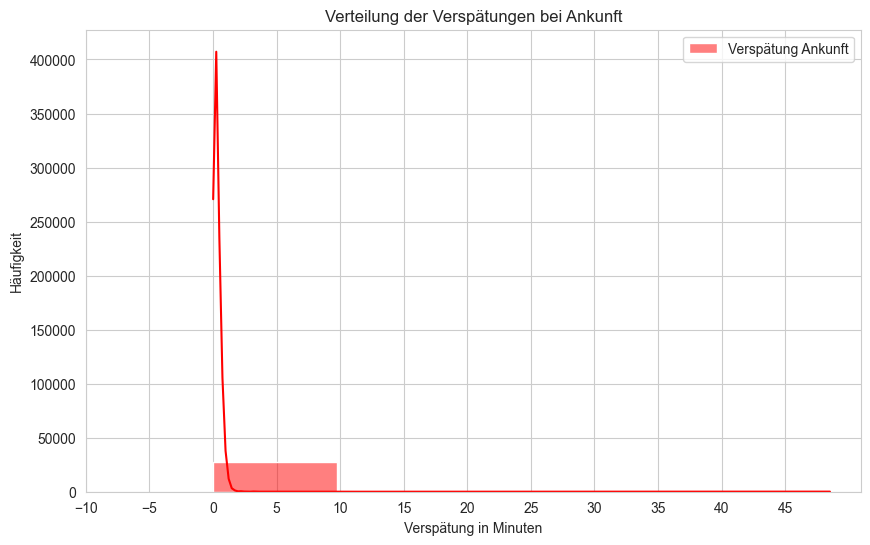

In [95]:
sns.set_style("whitegrid")

# Erstelle das Histogramm
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered_vbz_verspetungen_an, x="VERSPAETUNG_AN", kde=True, color="red", label="Verspätung Ankunft", bins=5)

# Achsenbeschriftung und Titel
plt.xlabel("Verspätung in Minuten")
plt.ylabel("Häufigkeit")
plt.title("Verteilung der Verspätungen bei Ankunft")
plt.xticks(range(-10, 50, 5))

#plt.ylim(0, 10000)

# Legende anzeigen
plt.legend()

# Diagramm anzeigen
plt.show()

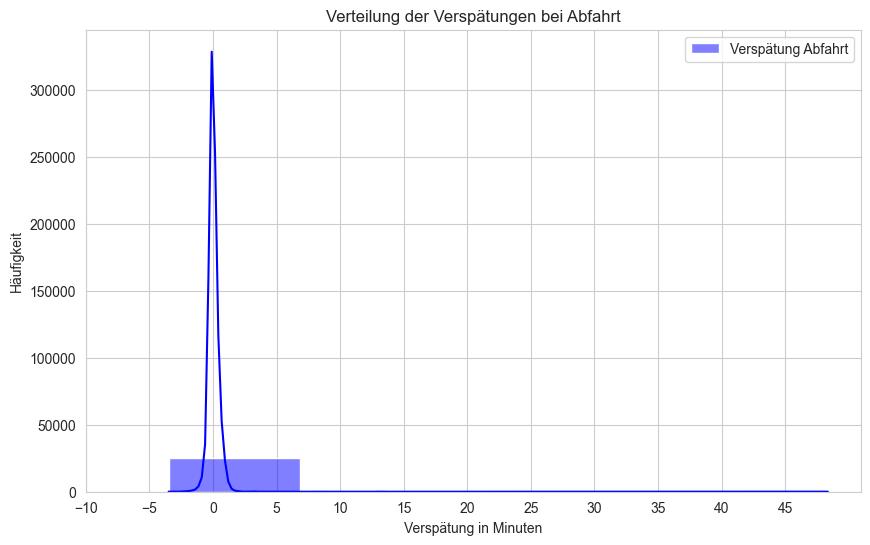

In [96]:
sns.set_style("whitegrid")

# Erstelle das Histogramm
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered_vbz_verspetungen_an, x="VERSPAETUNG_AB", kde=True, color="blue", label="Verspätung Abfahrt", bins=5)

# Achsenbeschriftung und Titel
plt.xlabel("Verspätung in Minuten")
plt.ylabel("Häufigkeit")
plt.title("Verteilung der Verspätungen bei Abfahrt")
plt.xticks(range(-10, 50, 5))
#plt.ylim(0, 10000)

# Legende anzeigen
plt.legend()

# Diagramm anzeigen
plt.show()

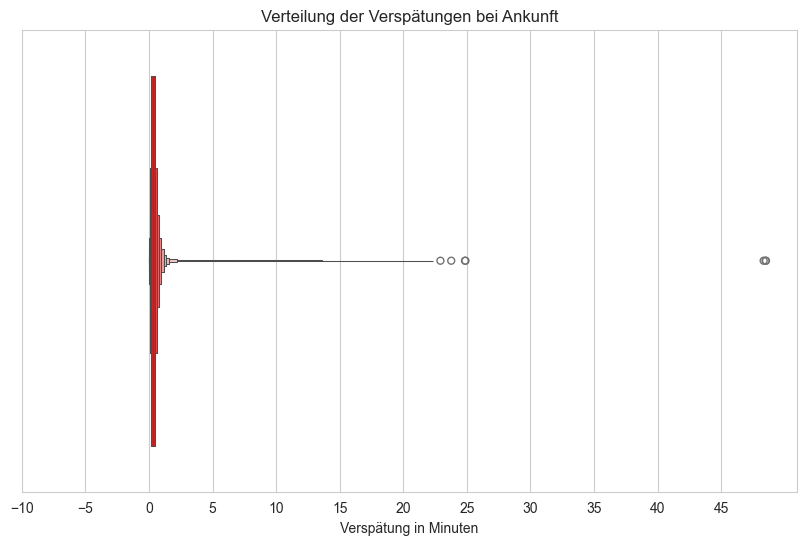

In [ ]:
sns.set_style("whitegrid")

# Erstelle das Histogramm
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df_filtered_vbz_verspetungen_an, x="VERSPAETUNG_AN", color="red")

# Achsenbeschriftung und Titel
plt.title("Verteilung der Verspätungen bei Ankunft")
plt.xlabel("Verspätung in Minuten")
plt.xticks(range(-10, 50, 5))

# Diagramm anzeigen
plt.show()

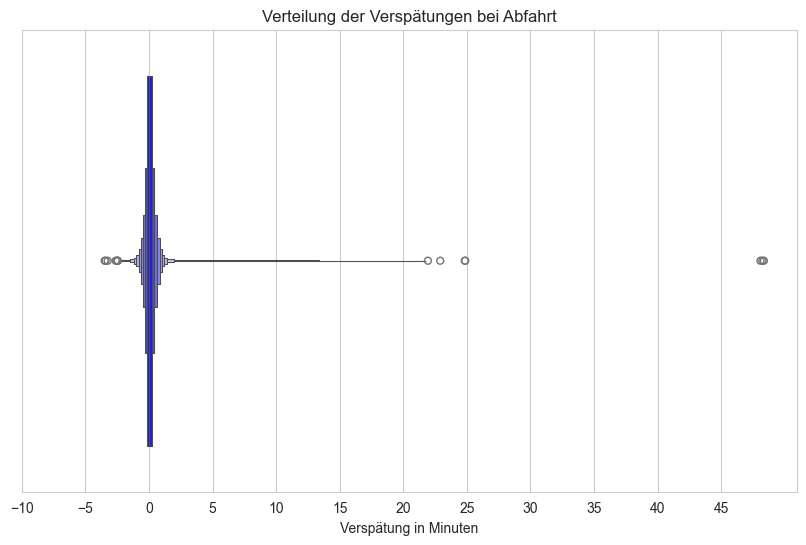

In [ ]:
sns.set_style("whitegrid")

# Erstelle das Histogramm
plt.figure(figsize=(10, 6))
sns.boxenplot(data=df_filtered_vbz_verspetungen_an, x="VERSPAETUNG_AB", color="blue")

# Achsenbeschriftung und Titel
plt.title("Verteilung der Verspätungen bei Abfahrt")
plt.xlabel("Verspätung in Minuten")
plt.xticks(range(-10, 50, 5))

# Diagramm anzeigen
plt.show()